In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape,y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


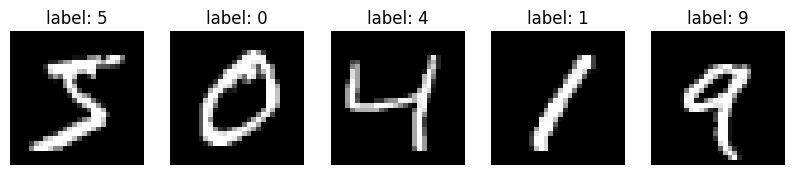

In [13]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.title(f'label: {y_train[i]}')
    plt.axis('off')
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    
    # First hidden layer - increase neurons
    keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.BatchNormalization(),  # Add this
    keras.layers.Dropout(0.3),  # Reduce dropout slightly
    
    # Second hidden layer
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.BatchNormalization(),  # Add this
    keras.layers.Dropout(0.3),
    
    # Third hidden layer (new)
    keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.BatchNormalization(),
    
    # Output layer
    keras.layers.Dense(10, activation='softmax')
])
print('model created')

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    X_train,y_train,
    epochs=20,
    validation_split=0.3,
    batch_size=64,
    verbose=1
)

model created
Epoch 1/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.7974 - loss: 1.1668 - val_accuracy: 0.9478 - val_loss: 0.5268
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9354 - loss: 0.5423 - val_accuracy: 0.9604 - val_loss: 0.3958
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9468 - loss: 0.4229 - val_accuracy: 0.9603 - val_loss: 0.3372
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9517 - loss: 0.3600 - val_accuracy: 0.9606 - val_loss: 0.3102
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9488 - loss: 0.3408 - val_accuracy: 0.9593 - val_loss: 0.3055
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9535 - loss: 0.3165 - val_accuracy: 0.9654 - val_loss: 0.2717
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9544 - loss: 0.2988 - val_accuracy: 0.9621 - val_loss: 0.2787
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9544 - loss: 

In [ ]:
test_loss,test_accuracy = model.evaluate(X_test,y_test)
print(f"\nTest accuracy = {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
test_size=20
start=20
pridiction = model.predict(X_test[start:start+test_size])

# Plot images with predictions
plt.figure(figsize=(20, 5))
for i in range(test_size):
    plt.subplot(1, test_size, i+1)
    plt.imshow(X_test[i], cmap='gray')
    predicted_label = np.argmax(pridiction[i])
    true_label = y_test[i]
    plt.title(f'Pred: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')
plt.show()

In [ ]:
# Assuming x_test and y_test are your test data and true labels
y_pred_probs = model.predict(X_test)  # Predict class probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels
cm = confusion_matrix(y_test, y_pred)


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
